## Vectorial Maps
### Santiago Metropolitan Region
By: Marcelo Rovai @20Nov18

### Dataset: INE
#### Map Gallery / Censo 2017 (Definitive Result)
"Region Metroplitana de Chile (R13)" <br>
http://www.ine.cl/herramientas/galeria-de-mapas/censo
<p>Split files related with "Comuna"</p>

- Comuna.cpg
- Comuna.shp
- Comuna.dbf 
- Comuna.shp.xml
- Comuna.prj 
- Comuna.shx
- Comuna.sbn 
- Comuna.sbx

### To Install pyshp: 
`pip install pyshp`

In [3]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
%matplotlib inline 

In [7]:
!dir .\data\Comunas_RM_Mapas_Vectoriales

 Volume in drive C is OS
 Volume Serial Number is 82CD-690B

 Directory of c:\Users\pohar\Documents\Development\Python\Chloropleth\data\Comunas_RM_Mapas_Vectoriales

16/01/2022  14:21    <DIR>          .
16/01/2022  14:18    <DIR>          ..
16/01/2022  14:20           174,087 Comuna.cpg
16/01/2022  14:20           162,986 Comuna.dbf
16/01/2022  14:21           174,285 Comuna.prj
16/01/2022  14:21           162,988 Comuna.sbn
16/01/2022  14:21           162,988 Comuna.sbx
16/01/2022  14:21           163,080 Comuna.shp
16/01/2022  14:21           439,623 Comuna.shp.xml
16/01/2022  14:21           162,988 Comuna.shx
16/01/2022  14:21           168,248 Consideraciones Precenso 2016.pdf
               9 File(s)      1,771,273 bytes
               2 Dir(s)  379,326,849,024 bytes free


In [10]:
shp_path = "./data/Comunas_RM_Mapas_Vectoriales/Comuna.shp"
sf = shp.Reader(shp_path)

In [4]:
print ('number of shapes imported:',len(sf.shapes()))

number of shapes imported: 52


In [11]:
sf.records()[1]

Record #1: ['13', '131', '13115', 'REGIÓN METROPOLITANA DE SANTIAGO', 'SANTIAGO', 'LO BARNECHEA']

In [12]:
sf.records()[1][5]

'LO BARNECHEA'

In [13]:
sf.records()[25]

Record #25: ['13', '131', '13101', 'REGIÓN METROPOLITANA DE SANTIAGO', 'SANTIAGO', 'SANTIAGO']

In [15]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' column holding
    the geometry information. This uses the pyshp package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [16]:
df = read_shapefile(sf)
df.shape

(52, 7)

In [17]:
df.sample(5)

,REGION,PROVINCIA,COMUNA,NOM_REGION,NOM_PROVIN,NOM_COMUNA,coords
9,13,131,13105,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,EL BOSQUE,"[(-70.65469054099998, -33.54858120199998), (-7..."
33,13,136,13601,REGIÓN METROPOLITANA DE SANTIAGO,TALAGANTE,TALAGANTE,"[(-70.85391092699996, -33.63496152499994), (-7..."
22,13,131,13128,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,RENCA,"[(-70.69248812699993, -33.383720075999975), (-..."
46,13,135,13503,REGIÓN METROPOLITANA DE SANTIAGO,MELIPILLA,CURACAVÍ,"[(-70.99792311999994, -33.19919999999996), (-7..."
14,13,131,13111,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,LA GRANJA,"[(-70.60985596899997, -33.537431253999955), (-..."


In [18]:
df[df.NOM_COMUNA == 'SANTIAGO']

,REGION,PROVINCIA,COMUNA,NOM_REGION,NOM_PROVIN,NOM_COMUNA,coords
25,13,131,13101,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,SANTIAGO,"[(-70.66527655199997, -33.42827810699998), (-7..."


In [19]:
df.NOM_COMUNA

0              LAS CONDES
1            LO BARNECHEA
2                VITACURA
3              HUECHURABA
4                PUDAHUEL
5               QUILICURA
6               CERRILLOS
7               LO ESPEJO
8                   MAIPÚ
9               EL BOSQUE
10             LA PINTANA
11            LA CISTERNA
12              SAN RAMÓN
13             LA FLORIDA
14              LA GRANJA
15               LA REINA
16                  ÑUÑOA
17                  MACUL
18            SAN JOAQUÍN
19          INDEPENDENCIA
20               RECOLETA
21               CONCHALÍ
22                  RENCA
23            CERRO NAVIA
24          QUINTA NORMAL
25               SANTIAGO
26       ESTACIÓN CENTRAL
27               LO PRADO
28    PEDRO AGUIRRE CERDA
29             SAN MIGUEL
30            PROVIDENCIA
31                   BUIN
32               EL MONTE
33              TALAGANTE
34          ISLA DE MAIPO
35               PEÑAFLOR
36                 PIRQUE
37                  PAINE
38      SAN 

In [20]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]

    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

(-70.6578664226128, -33.44952095786441)

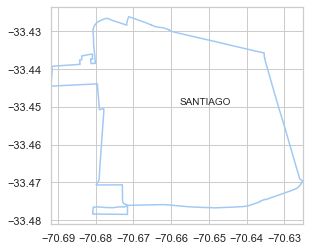

In [24]:
# Plot Comuna
comuna = 'SANTIAGO'
com_id = df[df.NOM_COMUNA == comuna].index.values[0]
plot_shape(com_id, comuna)


In [15]:
com_id

25

(-70.54907466888457, -33.52751419264744)

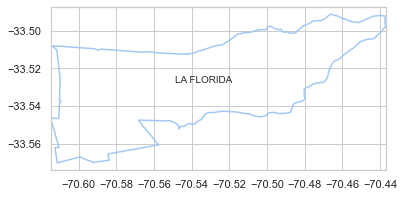

In [25]:
# Plot Comuna
comuna = 'LA FLORIDA'
com_id = df[df.NOM_COMUNA == comuna].index.values[0]
plot_shape(com_id, comuna)

In [26]:
com_id

13

(-70.40719255480347, -33.317309885553684)

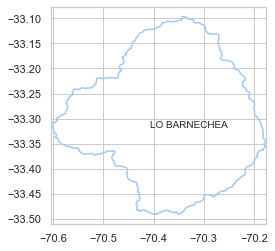

In [27]:
# Plot Comuna
comuna = 'LO BARNECHEA'
com_id = df[df.NOM_COMUNA == comuna].index.values[0]
plot_shape(com_id, comuna)

In [28]:
com_id

1

In [29]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map withlim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim) 

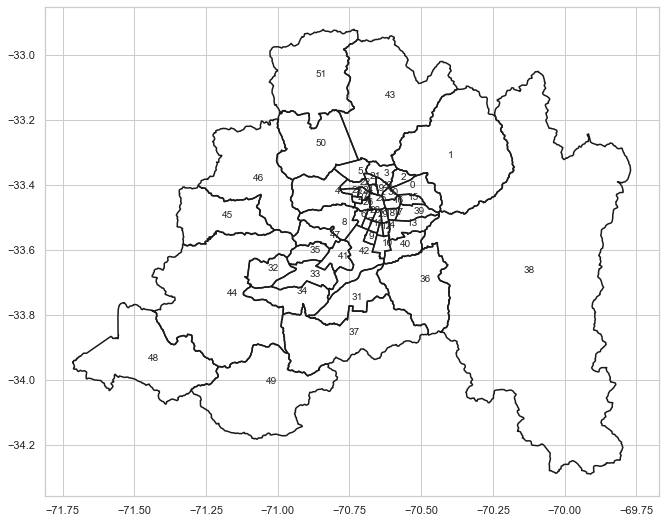

In [30]:
plot_map(sf)

In [31]:
# Limites aproximados provincia Santiago (RM)
y_lim = (-33.7,-33.3) # lat 
x_lim = (-71, -70.25) # long

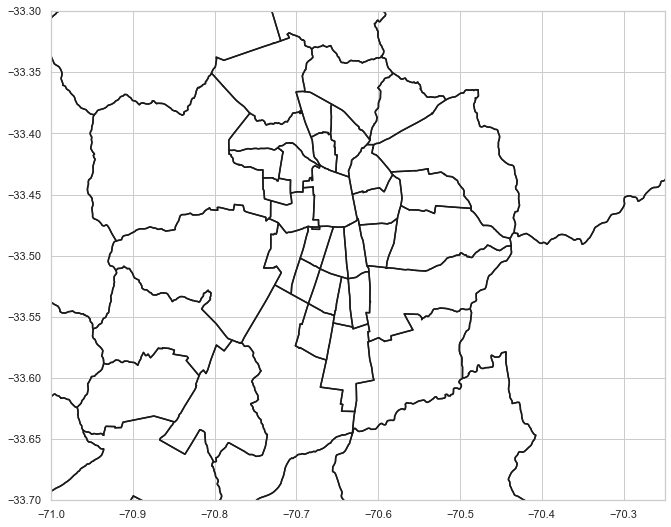

In [32]:
plot_map(sf, x_lim, y_lim)

In [33]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)

    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim) 

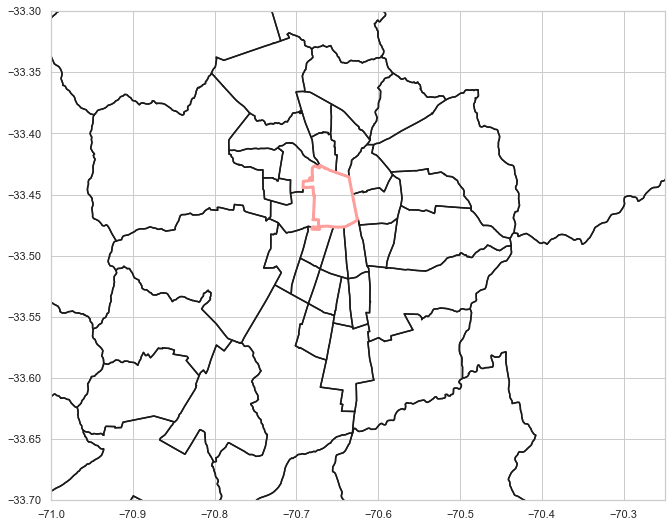

In [34]:
plot_map2(25, sf, x_lim, y_lim)

In [35]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)

    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim) 

<Figure size 792x648 with 0 Axes>

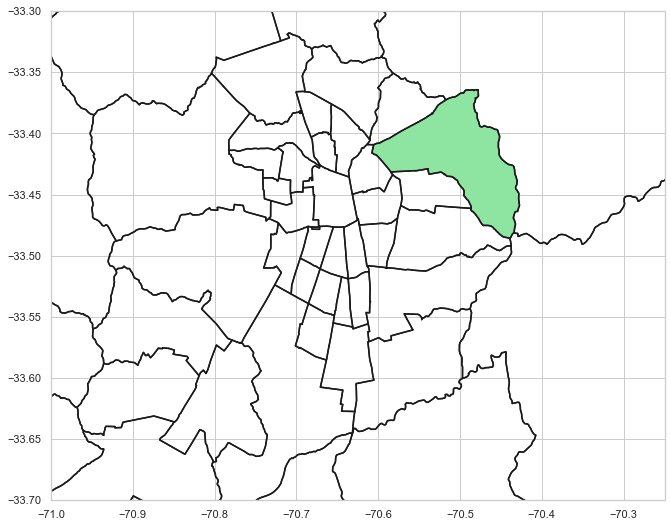

In [36]:
plot_map_fill(0, sf, x_lim, y_lim, color='g')

In [37]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
    #fig.savefig(title)

<Figure size 792x648 with 0 Axes>

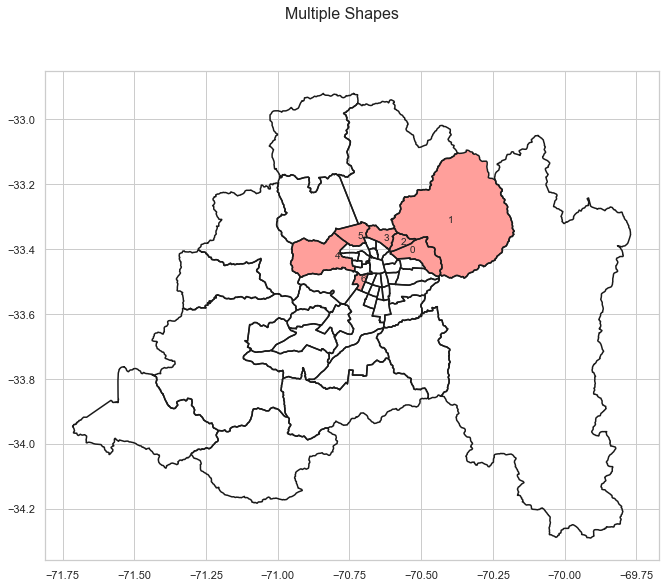

In [38]:
comuna_id = [0, 1, 2, 3, 4, 5, 6]
plot_map_fill_multiples_ids("Multiple Shapes", comuna_id, sf, color = 'r')

In [41]:
def plot_comunas(title, comunas, color):
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.NOM_COMUNA == i.upper()]
                         .index.values[0])
    plot_map_fill_multiples_ids(title, comuna_id, 
                                       sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color); 

<Figure size 792x648 with 0 Axes>

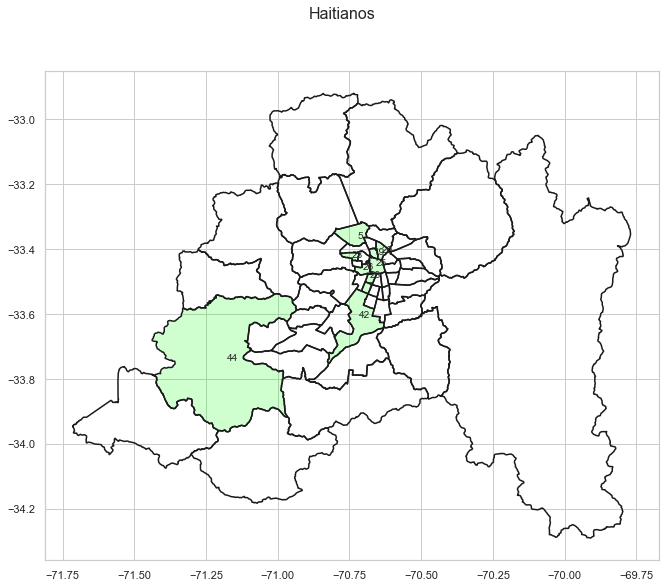

In [42]:
title = 'Haitianos'
comunas = ['QUILICURA', 'Estación Central', 'Santiago', 'San Bernardo', 'Melipilla', 'Recoleta', 'Pedro Aguirre Cerda', 'Lo Espejo', 'Independencia', 'Cerro Navia']
color = '#00FF0030' # color ==> RGB + Intencity  RRGGBBII
plot_comunas(title, comunas, color ) 

In [43]:
def conv_comuna(comuna):
    if comuna == 'estacion central': return 'estación central'
    elif comuna == 'nunoa': return 'ñuñoa'
    elif comuna == 'maipu': return 'maipú'
    elif comuna == 'san ramon': return 'san ramón'
    elif comuna == 'san joaquin': return 'san joaquín'
    elif comuna == 'conchali': return 'conchalí'
    elif comuna == 'penaflor': return 'peñaflor'
    elif comuna == 'san jose de maipo': return 'san josé de maipo'
    elif comuna == 'penalolen': return 'peñalolén'
    elif comuna == 'maria pinto': return 'maría pinto'
    elif comuna == 'curacavi': return 'curacaví'
    elif comuna == 'alhue': return 'alhué'    
    else: return comuna

In [44]:
def plot_comunas_2(sf, title, comunas, color):
    '''
    Plot map with selected comunes, using specific color
    '''
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        i = conv_comuna(i).upper()
        comuna_id.append(df[df.NOM_COMUNA == i.upper()]
                         .index.values[0])
    plot_map_fill_multiples_ids(title, comuna_id, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color); 

In [45]:
centro = ['santiago']
oriente = ['providencia', 'vitacura', 'lo barnechea', 'las condes', 'la reina', 'nunoa']
sureste = ['san jose de maipo', 'macul', 'la florida', 'penalolen',]
sur = ['alhue', 'calera de tango', 'buin', 'isla de maipo', 'el bosque', 'paine', 'la granja', 'pedro aguirre cerda', 'lo espejo', 'puente alto', 'san joaquin', 'san miguel', 'pirque', 'san bernardo', 'san ramon', 'la cisterna', 'talagante', 'la pintana', ]
norte = ['tiltil', 'renca', 'quinta normal', 'cerro navia', 'lampa', 'conchali', 'recoleta', 'independencia', 'colina', 'huechuraba', 'quilicura', ]
poniente = ['san pedro', 'maria pinto', 'el monte', 'curacavi', 'padre hurtado', 'melipilla', 'estacion central', 'maipu', 'lo prado', 'pudahuel', 'penaflor', 'cerrillos', ]  

<Figure size 792x648 with 0 Axes>

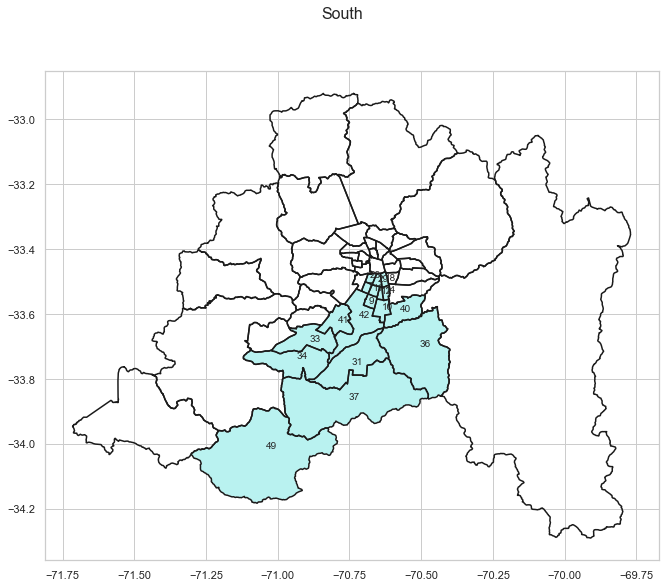

In [46]:
plot_comunas_2(sf, 'South', sur, 'c')

<Figure size 792x648 with 0 Axes>

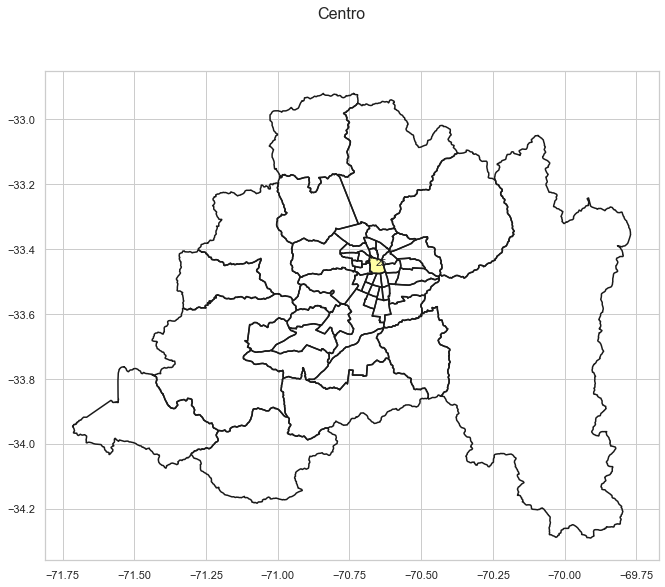

<Figure size 792x648 with 0 Axes>

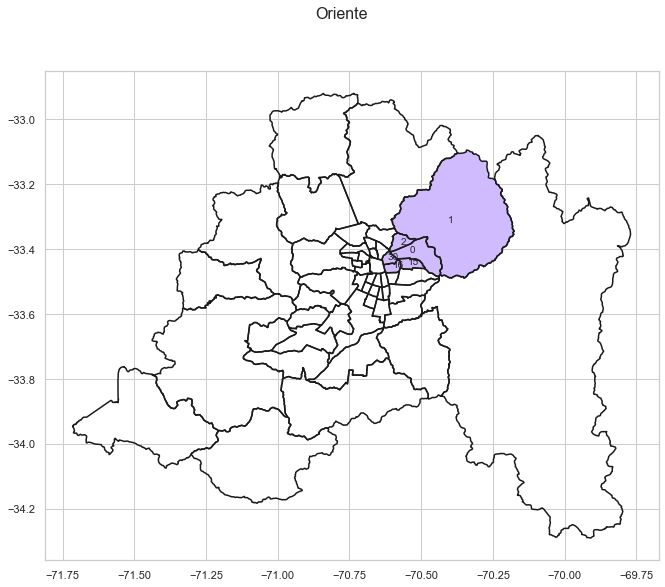

<Figure size 792x648 with 0 Axes>

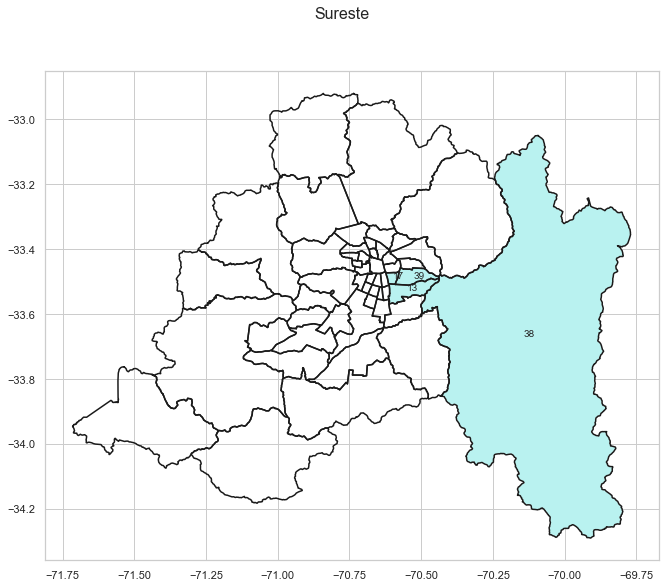

<Figure size 792x648 with 0 Axes>

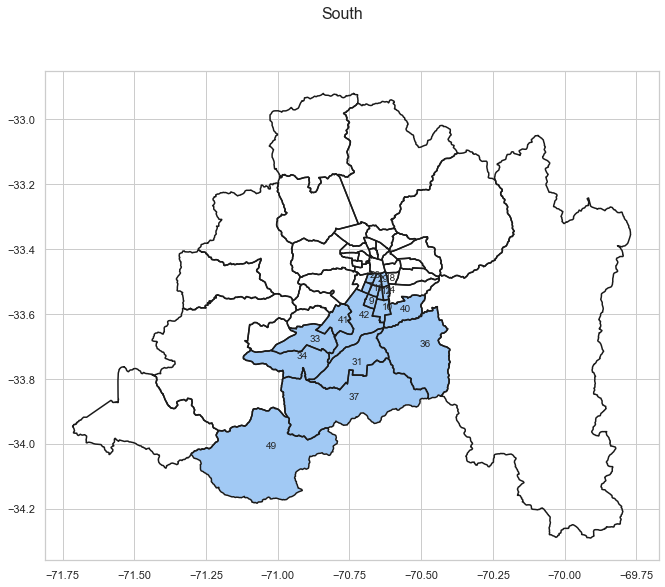

<Figure size 792x648 with 0 Axes>

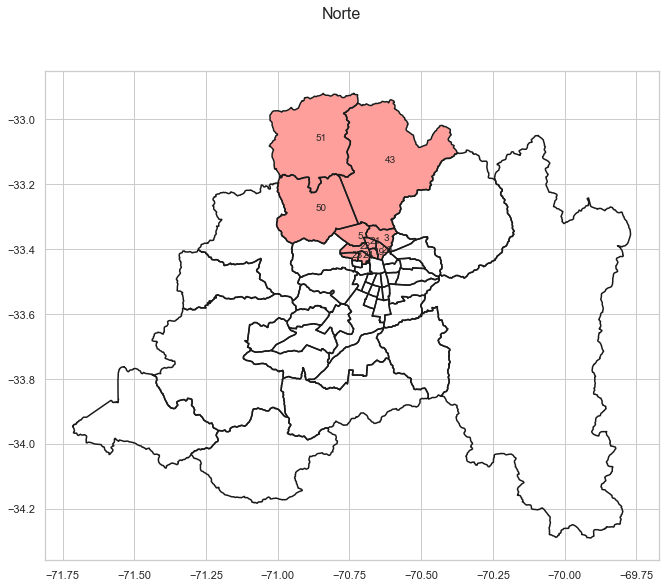

<Figure size 792x648 with 0 Axes>

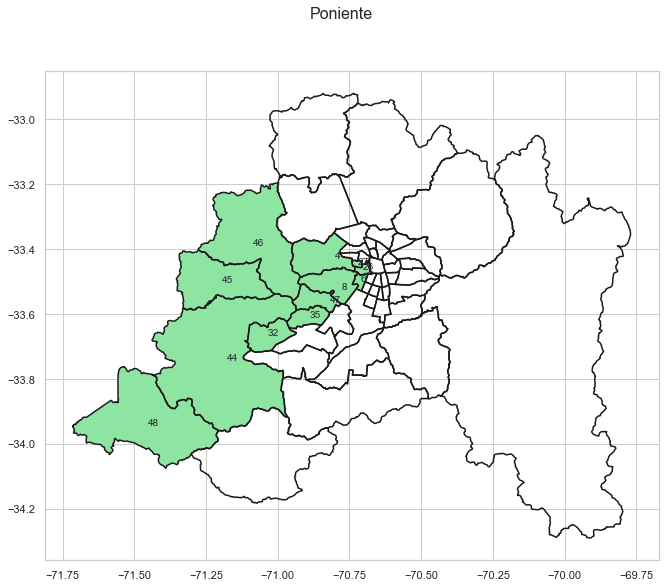

In [47]:
plot_comunas_2(sf, 'Centro', centro, 'y')
plot_comunas_2(sf, 'Oriente', oriente, 'm')
plot_comunas_2(sf, 'Sureste', sureste, 'c')
plot_comunas_2(sf, 'South', sur, 'b')
plot_comunas_2(sf, 'Norte', norte, 'r')
plot_comunas_2(sf, 'Poniente', poniente, 'g')

In [54]:
def plot_comunas_3(sf, title, comunas, data, color=None):
    '''
    Plot map with selected comunes, using specific color
    '''
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        i = conv_comuna(i).upper()
        comuna_id.append(df[df.NOM_COMUNA == i.upper()].index.values[0])
    plot_map_fill_multiples_ids_3(sf, title, comuna_id,  color_ton, bins, x_lim = None, y_lim = None, figsize = (11,9));

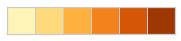

In [49]:
colors = sns.color_palette('YlOrBr', n_colors=6)
sns.palplot(colors, 0.5)

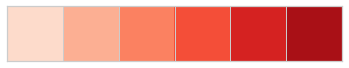

In [50]:
colors = sns.color_palette('Reds', n_colors=6)
sns.palplot(colors, 1)

In [51]:
def calc_color(data, color=None):
        if color   == 1: color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; colors = 'YlGnBu';
        elif color == 3: color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; colors = 'Greys';
        elif color == 9: color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000']
        else:            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+" => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [52]:
def plot_map_fill_multiples_ids_3(sf, title, comuna,  color_ton, bins, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''   
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)]);
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
    fig.savefig(title)
    plt.show();


1: 100 => 265 
2: 266 => 365 
3: 366 => 449 
4: 450 => 532 
5: 533 => 832 
6: 833 => 1999 

   1   2   3   4   5   6


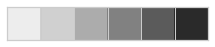

<Figure size 792x648 with 0 Axes>

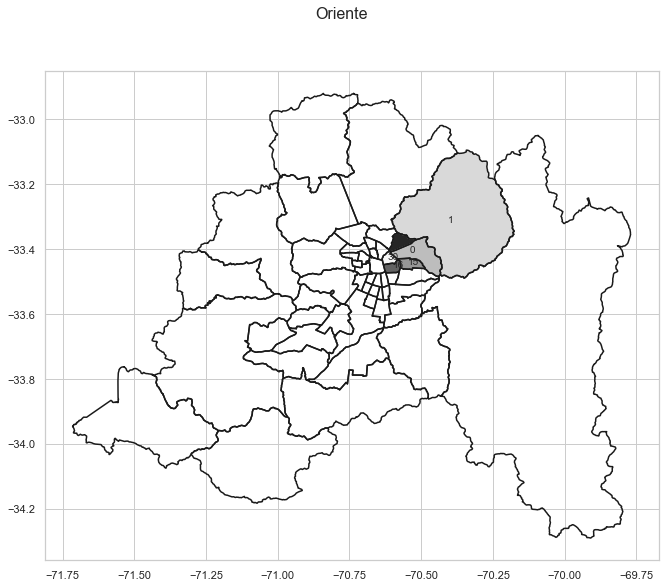

In [55]:
oriente = ['providencia', 'vitacura', 'lo barnechea', 'las condes', 'la reina', 'nunoa']
data = [100, 2000, 300, 400, 500, 600]
plot_comunas_3(sf, 'Oriente', oriente, data, 3)

In [56]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        i = conv_comuna(i).upper()
        comuna_id.append(df[df.NOM_COMUNA == 
                            i.upper()].index.values[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [57]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
    fig.savefig(title);


1: 100 => 265 
2: 266 => 365 
3: 366 => 499 
4: 500 => 599 
5: 600 => 1999 
6: 2000 => 399999 

   1   2   3   4   5   6


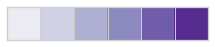

<Figure size 792x648 with 0 Axes>

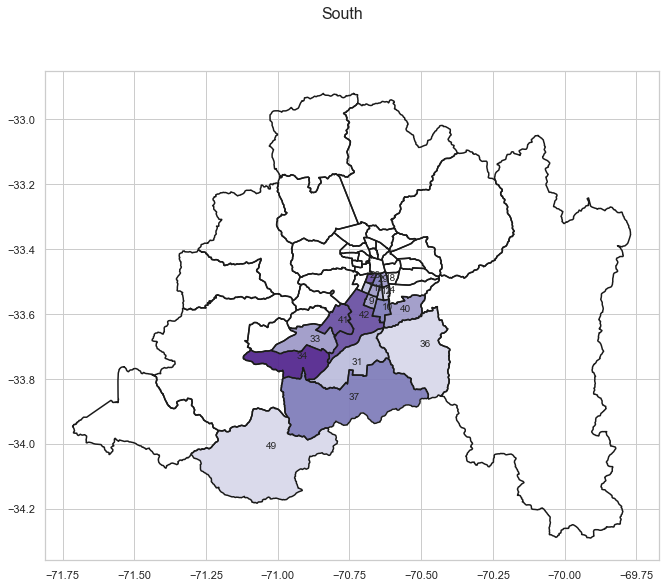

In [58]:
sur = ['alhue', 'calera de tango', 'buin', 'isla de maipo', 'el bosque', 'paine', 'la granja', 'pedro aguirre cerda', 'lo espejo', 'puente alto', 'san joaquin', 'san miguel', 'pirque', 'san bernardo', 'san ramon', 'la cisterna', 'talagante', 'la pintana']
data = [100, 2000, 300, 400000, 500, 600, 100, 2000, 300, 400, 500, 600, 100, 2000, 300, 400, 500, 600]
print_id = True
plot_comunas_data(sf, 'South', sur, data, 1, print_id)


1: 100 => 265 
2: 266 => 365 
3: 366 => 449 
4: 450 => 532 
5: 533 => 832 
6: 833 => 1999 

   1   2   3   4   5   6


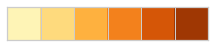

<Figure size 792x648 with 0 Axes>

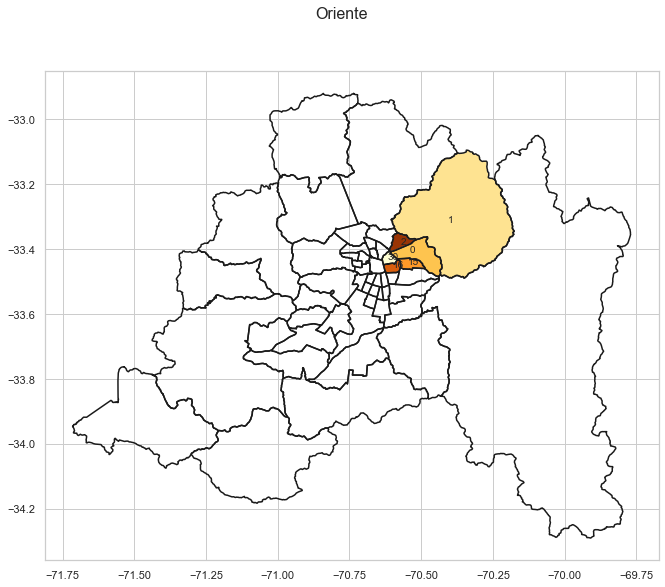

In [59]:
oriente = ['providencia', 'vitacura', 'lo barnechea', 'las condes', 'la reina', 'nunoa']
data = [100, 2000, 300, 400, 500, 600]
plot_comunas_data(sf, 'Oriente', oriente, data, 4, True)


1: 0 => 15 
2: 16 => 25 
3: 26 => 34 
4: 35 => 42 
5: 43 => 50 
6: 51 => 59 

   1   2   3   4   5   6


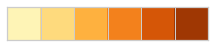

<Figure size 792x648 with 0 Axes>

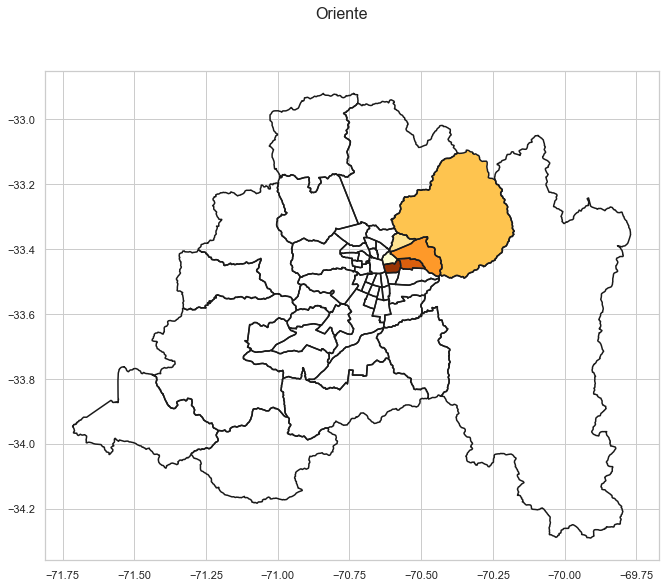

In [60]:
oriente = ['providencia', 'vitacura', 'lo barnechea', 'las condes', 'la reina', 'nunoa']
data = [0, 20, 30, 40, 50, 60]
plot_comunas_data(sf, 'Oriente', oriente, data)

# Census 2017

In [63]:
census_17 = pd.read_excel('./data/CENSO_2017_COMUNAS_RM.xlsx')
census_17.shape

(52, 7)

In [64]:
census_17.head()

,COMUNA,NOM_COMUNA,INMIGRANTES,PERSONAS,INM_PERC,TOTAL_VIV,PERS_VIV
0,13101,santiago,110732,404495,27.375369,193628,2.089032
1,13102,cerrillos,3620,80832,4.478424,24547,3.292948
2,13103,cerro navia,6022,132622,4.540725,38020,3.488217
3,13104,conchali,9223,126955,7.264779,37759,3.362245
4,13105,el bosque,3368,162505,2.072552,47941,3.389687



1: 6444 => 36070 
2: 36071 => 90200 
3: 90201 => 101603 
4: 101604 => 132621 
5: 132622 => 209322 
6: 209323 => 568105 

   1   2   3   4   5   6


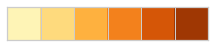

<Figure size 792x648 with 0 Axes>

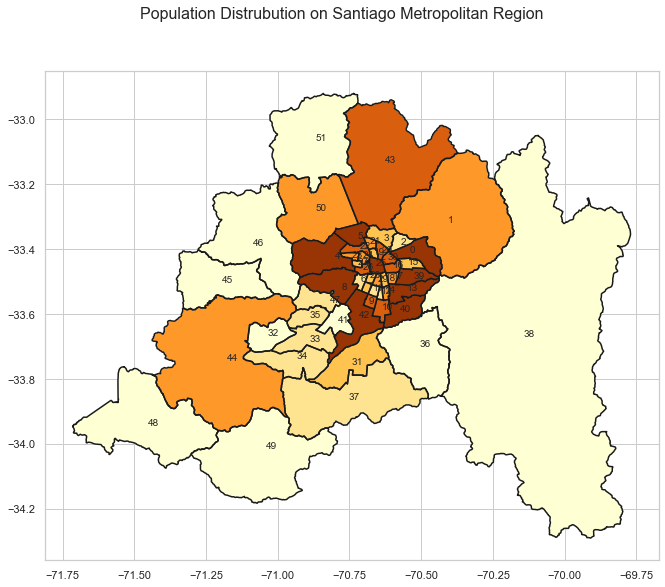

In [65]:
title = 'Population Distrubution on Santiago Metropolitan Region'
data = census_17.PERSONAS
names = census_17.NOM_COMUNA
plot_comunas_data(sf, title, names, data, 4, True)


1: 0 => 0 
2: 1 => 1 
3: 2 => 2 
4: 3 => 4 
5: 5 => 7 
6: 8 => 28 

   1   2   3   4   5   6


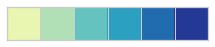

<Figure size 792x648 with 0 Axes>

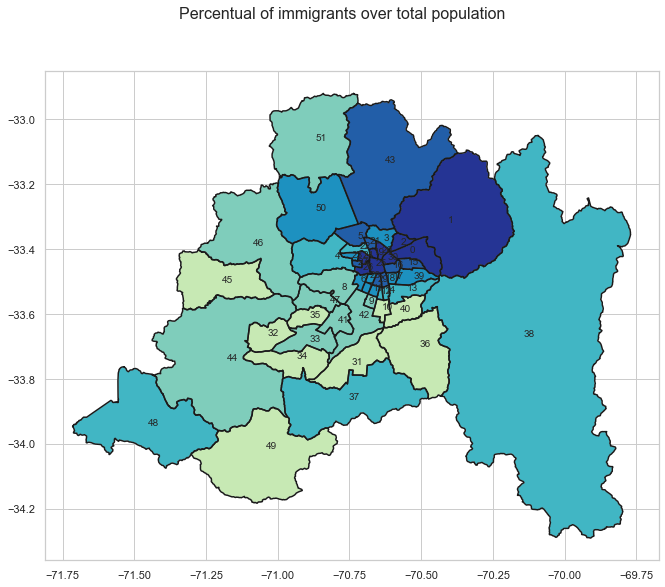

In [66]:
title = 'Percentual of immigrants over total population'
data = census_17.INM_PERC
names = census_17.NOM_COMUNA
plot_comunas_data(sf, title, names, data, 2, True)

---

## Testing other shapes

In [68]:
ls data\cb_2017_us_state_5m

 Volume in drive C is OS
 Volume Serial Number is 82CD-690B

 Directory of c:\Users\pohar\Documents\Development\Python\Chloropleth\data\cb_2017_us_state_5m

17/01/2022  08:35    <DIR>          .
17/01/2022  08:32    <DIR>          ..
17/01/2022  08:33                 5 cb_2017_us_state_5m.cpg
17/01/2022  08:33             9,058 cb_2017_us_state_5m.dbf
17/01/2022  08:34               165 cb_2017_us_state_5m.prj
17/01/2022  08:34         1,400,104 cb_2017_us_state_5m.shp
17/01/2022  08:34            18,212 cb_2017_us_state_5m.shp.ea.iso.xml
17/01/2022  08:35            32,166 cb_2017_us_state_5m.shp.iso.xml
17/01/2022  08:35            18,544 cb_2017_us_state_5m.shp.xml
17/01/2022  08:35               548 cb_2017_us_state_5m.shx
               8 File(s)      1,478,802 bytes
               2 Dir(s)  379,016,212,480 bytes free


In [69]:
shp_path = "./data/cb_2017_us_state_5m/cb_2017_us_state_5m.shp"
sf = shp.Reader(shp_path)

In [70]:
print ('number of shapes imported:',len(sf.shapes()))
sf.records()[1]

number of shapes imported: 56


Record #1: ['02', '01785533', '0400000US02', '02', 'AK', 'Alaska', '00', 1478588231566, 277723861311]

(-87.17841894954901, 31.82460642307632)

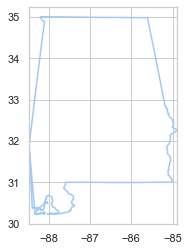

In [71]:
plot_shape(0)

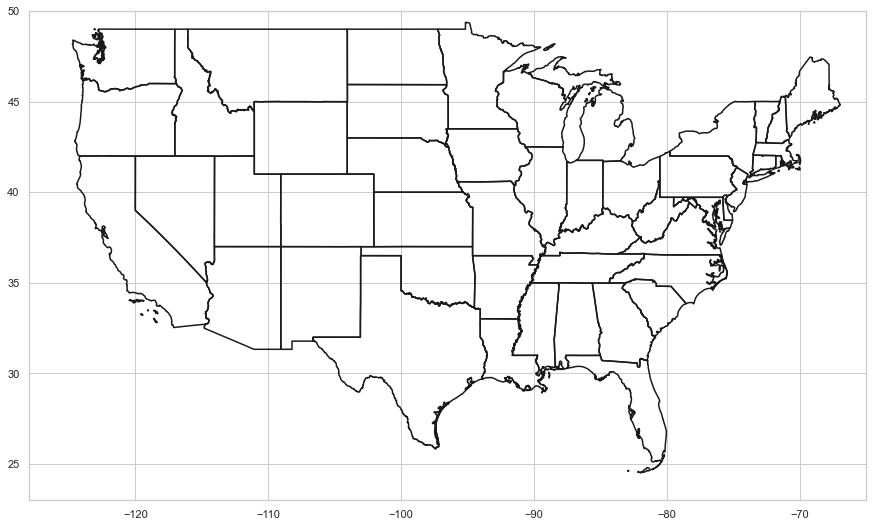

In [72]:
# Continental US
y_lim = (23, 50) # lat 
x_lim = (-128, -65) # long

plot_map(sf, x_lim, y_lim, figsize = (15,9))

<Figure size 1080x648 with 0 Axes>

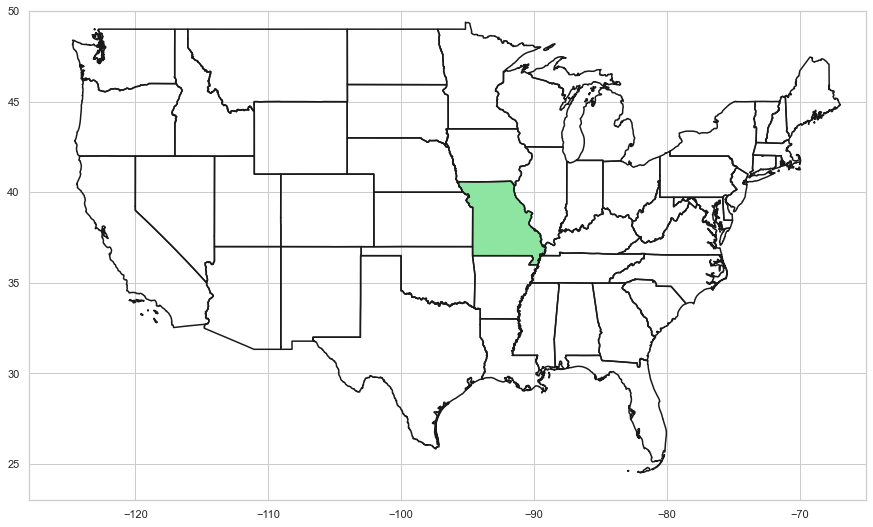

In [73]:
plot_map_fill(20, sf, x_lim, y_lim, color='g', figsize = (15,9))

<Figure size 1080x648 with 0 Axes>

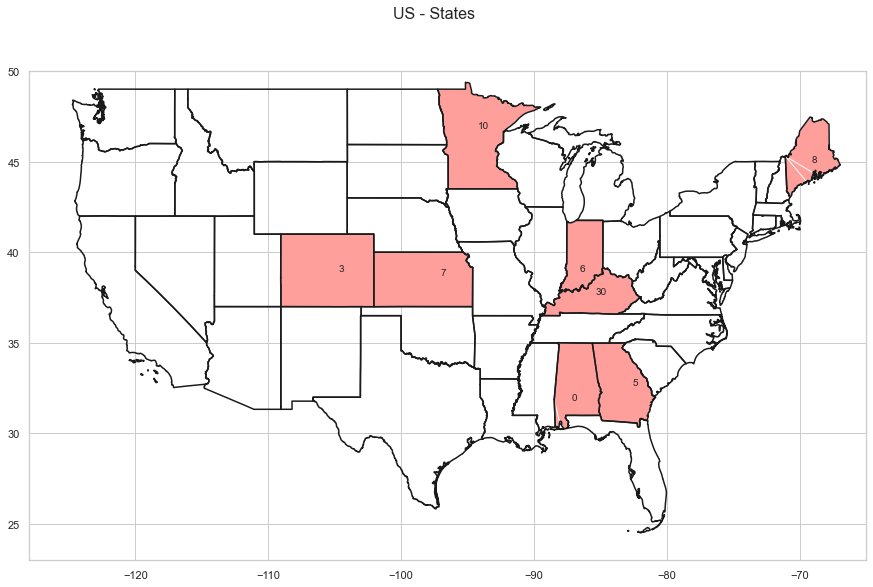

In [74]:
state_id = [0, 10, 3, 5, 6, 7, 8, 30]
plot_map_fill_multiples_ids("US - States", state_id, sf, x_lim, y_lim, color = 'r', figsize = (15,9))

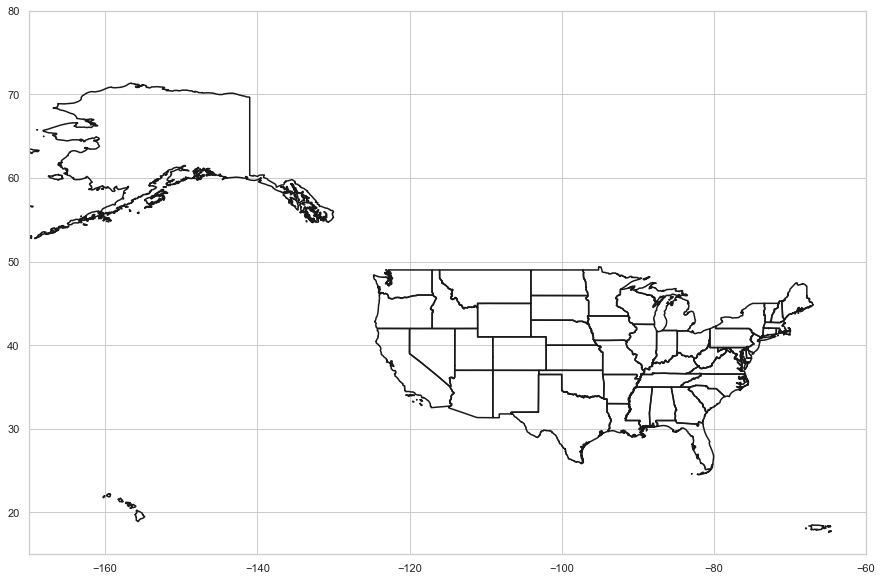

In [75]:
# US
y_lim = (15, 80) # lat 
x_lim = (-170, -60) # long

plot_map(sf, x_lim, y_lim, figsize = (15,10))